# Have A Quick Look of The Data 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
import geojsonio
import folium
import folium.plugins as plugins
import networkx as nx
from sklearn import metrics
% matplotlib inline
plt.style.use('seaborn-whitegrid')

In [24]:
datafile = "201810-citibike-tripdata.csv"
df = pd.read_csv(datafile)

In [25]:
df = df.dropna(how='any') # drop the data that contain nan

In [26]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.878433e+06,1.878433e+06,1.878433e+06,1.878433e+06,1.878433e+06,1.878433e+06,1.878433e+06,1.878433e+06,1.878433e+06,1.878433e+06
mean,8.998951e+02,1.601003e+03,4.073732e+01,-7.398267e+01,1.593994e+03,4.073710e+01,-7.398285e+01,2.754935e+04,1.979710e+03,1.172025e+00
std,8.512110e+03,1.447370e+03,3.037752e-02,1.917668e-02,1.447052e+03,3.016897e-02,1.924025e-02,6.655173e+03,1.196053e+01,5.255263e-01
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.407196e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.570000e+02,3.800000e+02,4.071755e+01,-7.399530e+01,3.790000e+02,4.071755e+01,-7.399596e+01,2.069400e+04,1.970000e+03,1.000000e+00
50%,5.990000e+02,5.070000e+02,4.073782e+01,-7.398602e+01,5.050000e+02,4.073756e+01,-7.398658e+01,3.012700e+04,1.982000e+03,1.000000e+00
75%,1.037000e+03,3.258000e+03,4.075757e+01,-7.397283e+01,3.258000e+03,4.075715e+01,-7.397344e+01,3.328400e+04,1.989000e+03,1.000000e+00
max,2.500911e+06,3.712000e+03,4.081439e+01,-7.390774e+01,3.712000e+03,4.081439e+01,-7.390774e+01,3.544300e+04,2.002000e+03,2.000000e+00


In [27]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,330,2018-10-01 00:00:00.7010,2018-10-01 00:05:30.8490,293.0,Lafayette St & E 8 St,40.730207,-73.991026,504.0,1 Ave & E 16 St,40.732219,-73.981656,30493,Subscriber,1995,1
1,309,2018-10-01 00:00:13.5780,2018-10-01 00:05:23.2310,433.0,old - E 13 St & Avenue A,40.729554,-73.980572,394.0,E 9 St & Avenue C,40.725213,-73.977688,33054,Subscriber,1967,1
2,734,2018-10-01 00:00:16.6040,2018-10-01 00:12:31.5050,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,285.0,Broadway & E 14 St,40.734546,-73.990741,33400,Subscriber,1983,2
3,788,2018-10-01 00:00:35.0670,2018-10-01 00:13:43.5780,417.0,Barclay St & Church St,40.712912,-74.010202,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,31140,Customer,1988,1
4,1136,2018-10-01 00:00:38.1410,2018-10-01 00:19:34.6490,3699.0,W 50 St & 9 Ave,40.763605,-73.989180,495.0,W 47 St & 10 Ave,40.762699,-73.993012,20294,Subscriber,1969,0


# Plotting Map

In [6]:
def plot_on_map(df, bound, nyc_map, s=1, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].imshow(nyc_map, extent=bound)
    axs[0].scatter(df['start station longitude'], df['start station latitude'], alpha=alpha, c='r', s=s)
    axs[0].set_xlim((bound[0], bound[1]))
    axs[0].set_ylim((bound[2], bound[3]))
    axs[0].set_title('Start Station Locations')
    
    axs[1].imshow(nyc_map, extent=bound)
    axs[1].scatter(df['end station longitude'], df['end station latitude'], alpha=alpha, c='r', s=s)
    axs[1].set_xlim((bound[0], bound[1]))
    axs[1].set_ylim((bound[2], bound[3]))
    axs[1].set_title('End Station Locations')


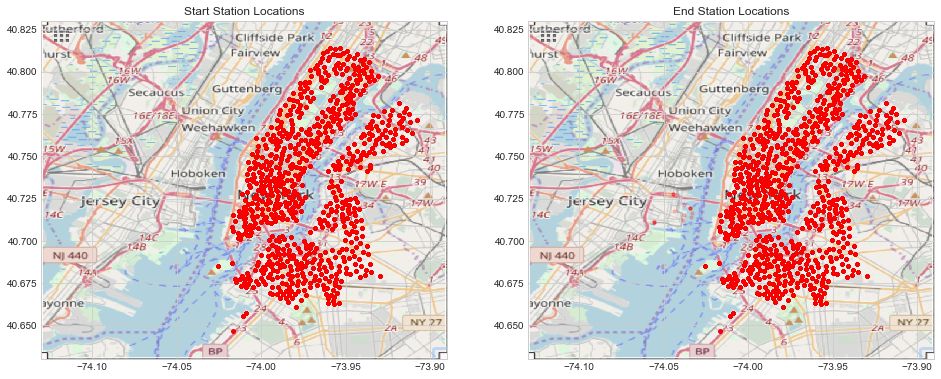

In [7]:
bound_zoom = (-74.13, -73.89, 40.63, 40.83)
nyc_map_zoom = plt.imread('nyc_map.png')
plot_on_map(df, bound_zoom, nyc_map_zoom,s=10)

# GeoJson

In [8]:
start_name = df['start station name'].unique()
end_name = df['end station name'].unique()

In [9]:
print(f'The number of unique names of start station is: {len(start_name)}')
print(f'The number of unique names of end station is: {len(end_name)}')
print('Since start stations and end stations are different, we need to plot two seperate plots')

The number of unique names of start station is: 765
The number of unique names of end station is: 777
Since start stations and end stations are different, we need to plot two seperate plots


In [10]:
start_dict = dict()
for name in start_name:
    start_dict[name] = (df[df['start station name'] == name].iloc[0]['start station latitude'],
                      df[df['start station name'] == name].iloc[0]['start station longitude'])

In [11]:
end_dict = dict()
for name in end_name:
    end_dict[name] = (df[df['end station name'] == name].iloc[0]['end station latitude'],
                      df[df['end station name'] == name].iloc[0]['end station longitude'])

In [12]:
map_dict = dict()
map_dict["type"] ="FeatureCollection"
features = list()
for station in start_dict:
    lat,lon,name = start_dict[station][0],start_dict[station][1],station
    data_point = { "type": "Feature",
        "geometry": {"type": "Point", "coordinates": [lon, lat]},
        "properties": {"Station Nmae": name}
        }
    features.append(data_point)
map_dict['features'] = features

In [ ]:
geojsonio.display(json.dumps(map_dict))

# Histogram of Duration

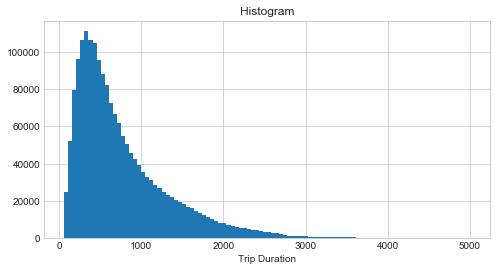

In [14]:
df[df.tripduration<5000].tripduration.hist(bins=100, figsize=(8,4))
plt.xlabel('Trip Duration')
plt.title('Histogram');

# Distance and time

In [28]:
# function for calculating distance
# This function is acquired online from:
# https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
def distance(lat1, lon1, lat2, lon2):
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    R = 6373
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (np.sin(dlat/2))**2 + np.cos(lat1) * np.cos(lat2) * (np.sin(dlon/2))**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

count    1.841838e+06
mean     1.806121e+00
std      1.382124e+00
min      3.391259e-02
25%      8.523120e-01
50%      1.392467e+00
75%      2.321285e+00
max      9.999294e+00
Name: distance, dtype: float64

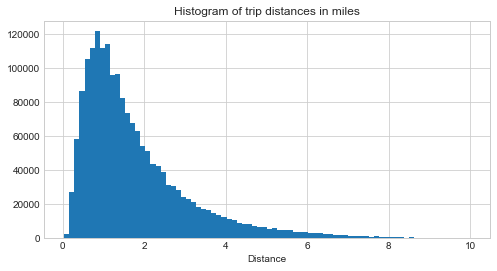

In [23]:
# add a new column for distance calculated
df['distance'] = distance(df['start station latitude'], df['start station longitude'], 
                          df['end station latitude'], df['end station longitude'])
# drop abnormal distance
df = df[df['distance'] <= 10]

# add a new column age
df['age'] = 2018 - df['birth year']

# add a new column age range
df['age range'] = np.where(df['age'] < 20, 'younger than 20', 
                 np.where(df['age'] <= 40, 'between 20 and 40',
                 np.where(df['age'] > 40, 'older than 40', '')))

# add new column - specified gender
df['gender_specified'] = np.where(df['gender'] == 0, 'unknown', 
                 np.where(df['gender'] == 1, 'male',
                 np.where(df['gender'] == 2, 'female', '')))

# drop if distance = 0 but tripduration > 0
df.drop(df[(df['distance'] == 0) & (df['tripduration'] > 0)].index, inplace = True)

# add new column - speed
df['speed'] = df['distance']/ (df['tripduration'] / 60)

#clean format for starttime and endtime:
df['starttime'] = df['starttime'].map(lambda x: x[:-5])
df['stoptime'] = df['stoptime'].map(lambda x: x[:-5])

# histogram of distance without grouping
df.distance.hist(bins=80, figsize=(8,4))
plt.xlabel('Distance')
plt.title('Histogram of trip distances in miles')
df.distance.describe()

<li>We can see from above histogram that the bike trips are primarily short-distance trips (less than 4 miles). There are few trips longer than 8 miles.
<li>We can get more insights by grouping the trip distances by gender, age, and user type, whose histograms are shown below respectively.

,count,mean,std,min,25%,50%,75%,max
gender_specified,,,,,,,,
female,440901.0,1.859749,1.381891,0.036747,0.897459,1.453288,2.393716,9.995026
male,1283147.0,1.772836,1.384803,0.033913,0.827926,1.350216,2.265098,9.999294
unknown,119501.0,1.978305,1.352550,0.036747,1.007151,1.648571,2.576019,9.979125


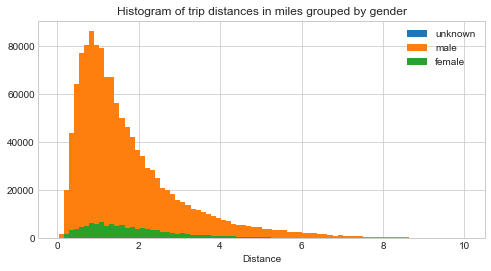

In [19]:
# histogram of distance with grouping of gender
df.groupby('gender_specified').distance.hist(bins=80, figsize=(8,4))
plt.xlabel('Distance')
plt.title('Histogram of trip distances in miles grouped by gender')
plt.legend(['unknown','male','female'])
df.groupby('gender_specified').distance.describe()

<li>We can see from above histogram that Citi bike users are primarily male. 

In [20]:
df.groupby('gender_specified')['distance', 'tripduration'].mean()
# calculate the average speed for different gender groups (mile/minute)
speed = (df.groupby('gender_specified')['distance'].mean())/(df.groupby('gender_specified')['tripduration'].mean()/60)

,count,mean,std,min,25%,50%,75%,max
age range,,,,,,,,
between 20 and 40,1105827.0,1.818172,1.376566,0.036747,0.867492,1.403273,2.331125,9.999294
older than 40,715501.0,1.799069,1.397775,0.033913,0.835539,1.383380,2.321032,9.995124
younger than 20,22221.0,1.501499,1.196513,0.033913,0.672862,1.147189,1.927469,9.820985


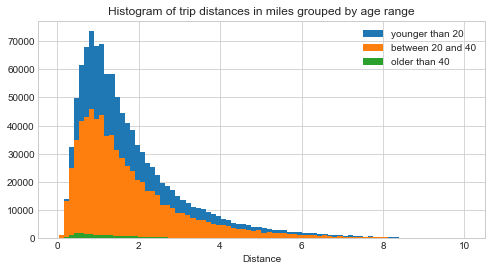

In [21]:
# histogram of distance with grouping of age
df.groupby('age range').distance.hist(bins=80, figsize=(8,4))
plt.xlabel('Distance')
plt.title('Histogram of trip distances in miles grouped by age range')
plt.legend(['younger than 20','between 20 and 40','older than 40'])
df.groupby('age range').distance.describe()

<li>The histogram above shows that users are primarily young and middle-age people. 

In [22]:
df.groupby('age range')['distance', 'tripduration'].mean()
# calculates average speed for different age groups (mile/minute)
speed = (df.groupby('age range')['distance'].mean()) / (df.groupby('age range')['tripduration'].mean() / 60)

,count,mean,std,min,25%,50%,75%,max
usertype,,,,,,,,
Customer,182042.0,2.076989,1.348241,0.036747,1.107094,1.770339,2.707736,9.982985
Subscriber,1661507.0,1.777353,1.383844,0.033913,0.832340,1.353662,2.268210,9.999294


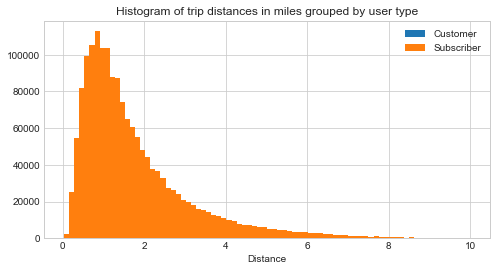

In [23]:
# histogram of distance with grouping of usertype
df.groupby('usertype').distance.hist(bins=80, figsize=(8,4))
plt.xlabel('Distance')
plt.title('Histogram of trip distances in miles grouped by user type')
plt.legend(['Customer','Subscriber'])
df.groupby('usertype').distance.describe()

<li>The histogram above shows that Citi bike users are basically all subscriber (people with annual pass). 

In [24]:
df.groupby('usertype')['distance', 'tripduration'].mean()
# calculates average speed for different user types (mile/minute)
speed = (df.groupby('usertype')['distance'].mean()) / (df.groupby('usertype')['tripduration'].mean() / 60)

Text(0.5,1,'Uknown')

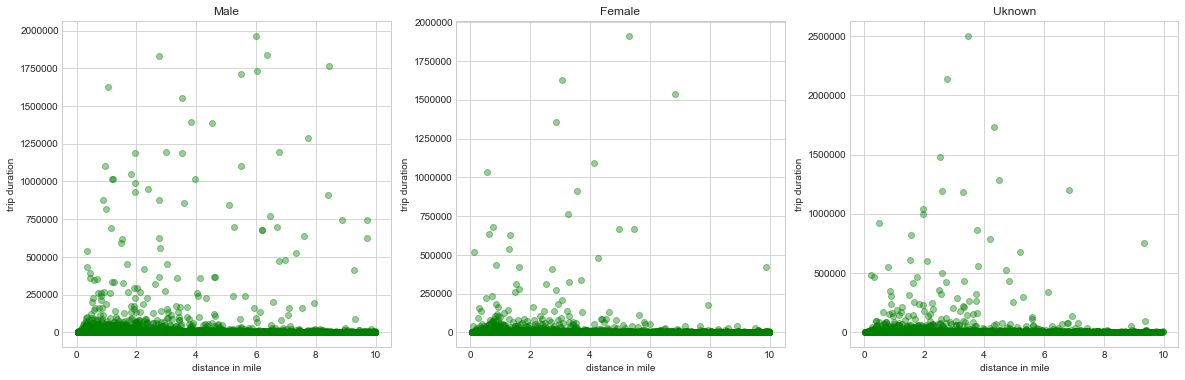

In [25]:
# scatter plot distance - trip duration (grouped by gender)
fig, axs = plt.subplots(1, 3, figsize=(20,6))
axs[0].scatter(df[df['gender_specified'] == 'male'].distance, df[df['gender_specified'] == 'male'].tripduration, alpha = 0.4, c = 'g')
axs[0].set_xlabel('distance in mile')
axs[0].set_ylabel('trip duration')
axs[0].set_title('Male')

axs[1].scatter(df[df['gender_specified'] == 'female'].distance, df[df['gender_specified'] == 'female'].tripduration, alpha = 0.4, c = 'g')
axs[1].set_xlabel('distance in mile')
axs[1].set_ylabel('trip duration')
axs[1].set_title('Female')

axs[2].scatter(df[df['gender_specified'] == 'unknown'].distance, df[df['gender_specified'] == 'unknown'].tripduration, alpha = 0.4, c = 'g')
axs[2].set_xlabel('distance in mile')
axs[2].set_ylabel('trip duration')
axs[2].set_title('Uknown')

<li>The scatter plot shows that male users are more likely to ride relatively longer distance than female users. 

Text(0.5,1,'Older than 40')

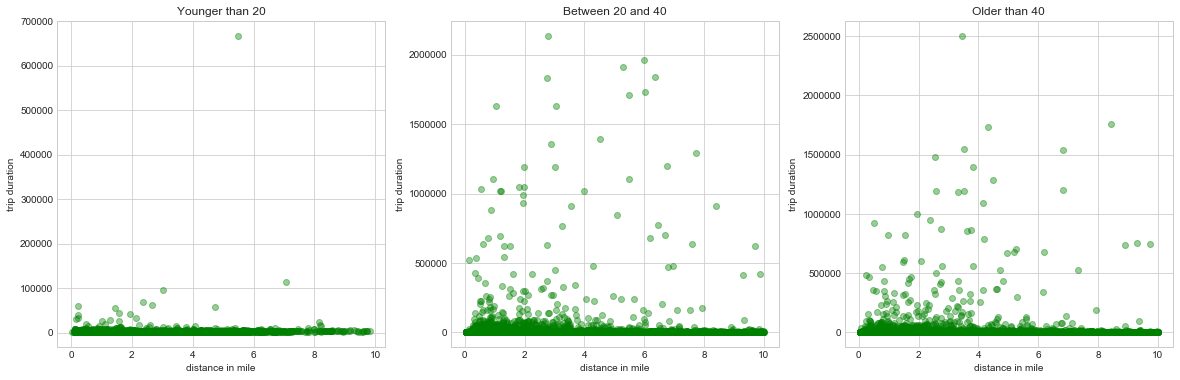

In [26]:
# scatter plot distance - trip duration (grouped by age range)
fig, axs = plt.subplots(1, 3, figsize=(20,6))
axs[0].scatter(df[df['age range'] == 'younger than 20'].distance, df[df['age range'] == 'younger than 20'].tripduration, alpha = 0.4, c = 'g')
axs[0].set_xlabel('distance in mile')
axs[0].set_ylabel('trip duration')
axs[0].set_title('Younger than 20')

axs[1].scatter(df[df['age range'] == 'between 20 and 40'].distance, df[df['age range'] == 'between 20 and 40'].tripduration, alpha = 0.4, c = 'g')
axs[1].set_xlabel('distance in mile')
axs[1].set_ylabel('trip duration')
axs[1].set_title('Between 20 and 40')

axs[2].scatter(df[df['age range'] == 'older than 40'].distance, df[df['age range'] == 'older than 40'].tripduration, alpha = 0.4, c = 'g')
axs[2].set_xlabel('distance in mile')
axs[2].set_ylabel('trip duration')
axs[2].set_title('Older than 40')

<li>The scatter plot shows that young users use Citi bikes primarily for short distance ride, while middle and old age people are more likely to ride a relatively longer distance. 

Text(0.5,1,'Subscriber')

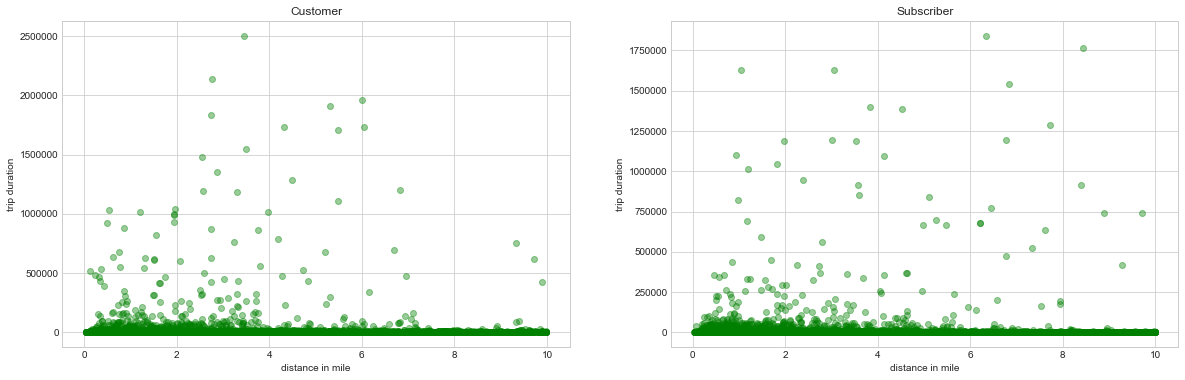

In [27]:
# scatter plot distance - trip duration (grouped by user type)
fig, axs = plt.subplots(1, 2, figsize=(20,6))
axs[0].scatter(df[df['usertype'] == 'Customer'].distance, df[df['usertype'] == 'Customer'].tripduration, alpha = 0.4, c = 'g')
axs[0].set_xlabel('distance in mile')
axs[0].set_ylabel('trip duration')
axs[0].set_title('Customer')

axs[1].scatter(df[df['usertype'] == 'Subscriber'].distance, df[df['usertype'] == 'Subscriber'].tripduration, alpha = 0.4, c = 'g')
axs[1].set_xlabel('distance in mile')
axs[1].set_ylabel('trip duration')
axs[1].set_title('Subscriber')

In [28]:
df['starttime'] = df['starttime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['day_of_week'] = df['starttime'].apply(lambda x: x.weekday()+1) #1-7 representing Mon to Sun
df['pickup_hour'] = df['starttime'].apply(lambda x:int(datetime.datetime.strftime(x,'%H')))
df['pickup_year'] = df['starttime'].apply(lambda x:int(datetime.datetime.strftime(x,'%Y')))
df['pickup_month'] = df['starttime'].apply(lambda x:int(datetime.datetime.strftime(x,'%m')))
# rename weekday, weekend
df['week'] = np.where(df['day_of_week'] < 6, 'weekday', 'weekend')

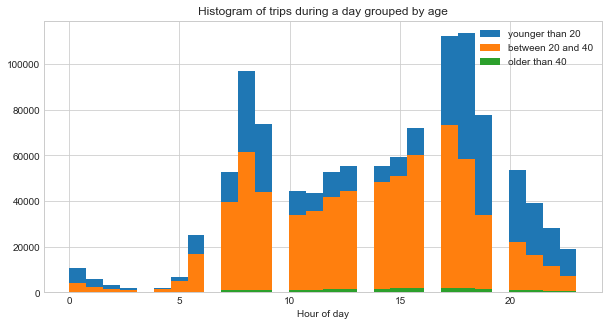

In [29]:
# histogram of number of trips during a day grouped by age
df.groupby('age range').pickup_hour.hist(bins=30, figsize=(10,5))
plt.xlabel('Hour of day')
plt.title('Histogram of trips during a day grouped by age')
plt.legend(['younger than 20', 'between 20 and 40', 'older than 40'])

<li>As the histogram shows above, there are more trips during rush hours (7am-9am and 16pm-19pm) in one day.
<li>We expect to see more people under the age of 20 using citi bike during rush hours since the probability of having a car for them is low.

# Rush hour speed

In [30]:
# filter out rush hour 
df_rush = df[((df['pickup_hour'] <= 9) & (df['pickup_hour'] >= 7)) | 
             ((df['pickup_hour'] <= 19) & (df['pickup_hour'] >= 16))]

Text(0.5,1,'Older than 40')

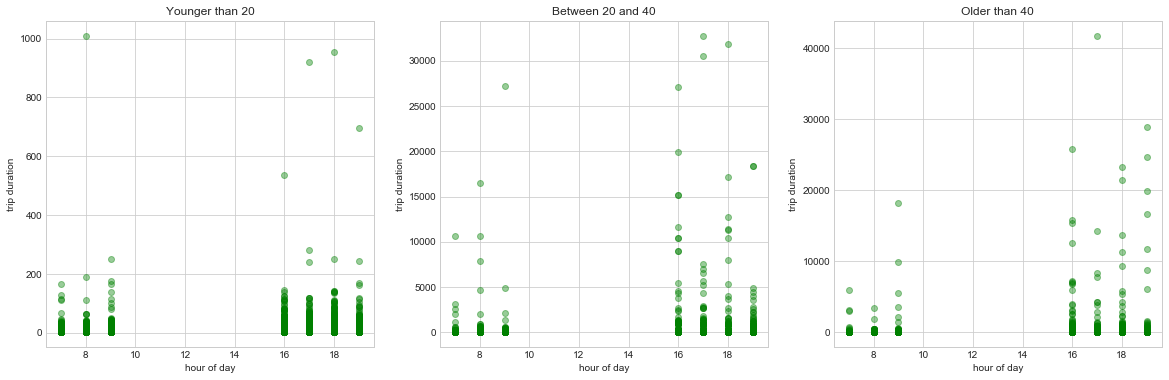

In [31]:
# scatter plot trip duration in a day (grouped by age range)
fig, axs = plt.subplots(1, 3, figsize=(20,6))
axs[0].scatter(df_rush[df_rush['age range'] == 'younger than 20'].pickup_hour, 
               (df_rush[df_rush['age range'] == 'younger than 20'].tripduration) / 60, 
               alpha = 0.4, c = 'g')
axs[0].set_xlabel('hour of day')
axs[0].set_ylabel('trip duration')
axs[0].set_title('Younger than 20')

axs[1].scatter(df_rush[df_rush['age range'] == 'between 20 and 40'].pickup_hour, 
               (df_rush[df_rush['age range'] == 'between 20 and 40'].tripduration) / 60, 
               alpha = 0.4, c = 'g')
axs[1].set_xlabel('hour of day')
axs[1].set_ylabel('trip duration')
axs[1].set_title('Between 20 and 40')

axs[2].scatter(df_rush[df_rush['age range'] == 'older than 40'].pickup_hour, 
               (df_rush[df_rush['age range'] == 'older than 40'].tripduration) / 60, 
               alpha = 0.4, c = 'g')
axs[2].set_xlabel('hour of day')
axs[2].set_ylabel('trip duration')
axs[2].set_title('Older than 40')

Text(0.5,1,'unknown')

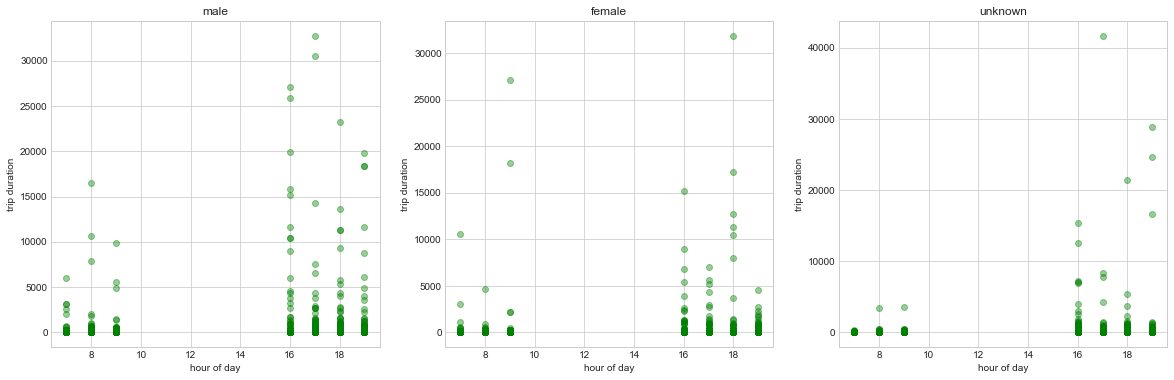

In [32]:
# scatter plot trip duration in one day(grouped by gender)
fig, axs = plt.subplots(1, 3, figsize=(20,6))
axs[0].scatter(df_rush[df_rush['gender_specified'] == 'male'].pickup_hour, 
               (df_rush[df_rush['gender_specified'] == 'male'].tripduration) / 60, 
               alpha = 0.4, c = 'g')
axs[0].set_xlabel('hour of day')
axs[0].set_ylabel('trip duration')
axs[0].set_title('male')

axs[1].scatter(df_rush[df_rush['gender_specified'] == 'female'].pickup_hour, 
               (df_rush[df_rush['gender_specified'] == 'female'].tripduration) / 60, 
               alpha = 0.4, c = 'g')
axs[1].set_xlabel('hour of day')
axs[1].set_ylabel('trip duration')
axs[1].set_title('female')

axs[2].scatter(df_rush[df_rush['gender_specified'] == 'unknown'].pickup_hour, 
               (df_rush[df_rush['gender_specified'] == 'unknown'].tripduration) / 60, 
               alpha = 0.4, c = 'g')
axs[2].set_xlabel('hour of day')
axs[2].set_ylabel('trip duration')
axs[2].set_title('unknown')

# Trips by hour on weekdays and weekends

<li>From the below two bar charts about pick-up times on weekday and weekend, we can see that weekday riders mainly use Citi Bikes to commute to and from work, with peak hours from 8–9 AM and 5–6 PM. On the other hand, weekend riders prefer a more leisurely schedule, with most rides occurring in mid afternoon.

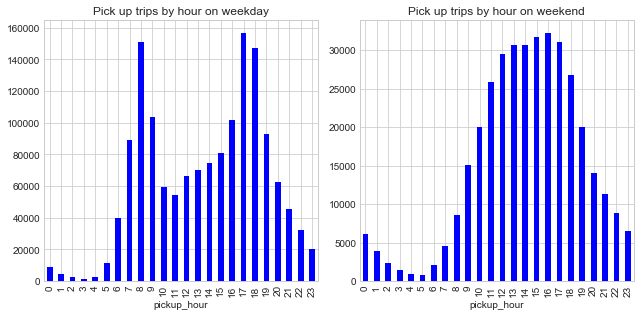

In [33]:
COL_NUM=2
ROW_NUM=1
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(9,4.5))

plt.subplot(1,2,1)
df_weekday=df[(df['day_of_week']!=6)&(df['day_of_week']!=7)]
group_weekday = df_weekday.groupby('pickup_hour')
group_weekday.size().plot(kind='bar',title="Pick up trips by hour on weekday",color='b')

plt.subplot(1,2,2)
df_weekend=df[(df['day_of_week']==6)|(df['day_of_week']==7)]
group_weekend = df_weekend.groupby('pickup_hour')
group_weekend.size().plot(kind='bar',title="Pick up trips by hour on weekend",color='b')

plt.tight_layout() 

<li>Citi Bike has two types of customers, Subsciber and Customer. Subscribers are people who buy anual pass to use citi bike, more for daily commute, whereas customers refer to people who buy daily pass, more for touring. Thus below we will separate users into annual subscriber and day-pass customer and study bike pick-up times per hour independently.

In [34]:
df['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

From the below graph, we can conclude anual subscribers mainly use Citi Bikes to commute to and from work, with peak hours from 8–9 AM and 5–6 PM. And on weekend, they mainly use it for entertainment, with peak in mid afternoon.

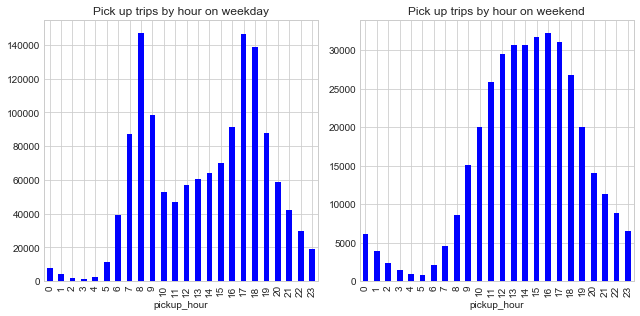

In [35]:
#Annual subscriber: pick up trips by hour

# Redefine the user scope.
df_subscriber=df[df['usertype']=='Subscriber']

# Plot subplots on weekdays and weekend.
COL_NUM=2
ROW_NUM=1
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(9,4.5))

plt.subplot(1,2,1)
df_weekday=df_subscriber[(df_subscriber['day_of_week']!=6)&(df_subscriber['day_of_week']!=7)]
group_weekday = df_weekday.groupby('pickup_hour')
group_weekday.size().plot(kind='bar',title="Pick up trips by hour on weekday",color='b')

plt.subplot(1,2,2)
df_weekend=df[(df['day_of_week']==6)|(df['day_of_week']==7)]
group_weekend = df_weekend.groupby('pickup_hour')
group_weekend.size().plot(kind='bar',title="Pick up trips by hour on weekend",color='b')

plt.tight_layout() 

From the below graph, we can conclude day-pass customers primarily use Citi Bikes in the mid afternoons no matter on weekday or weekend. It's because that those riders are mainly tourists, thus prefering a more leisurely schedule.

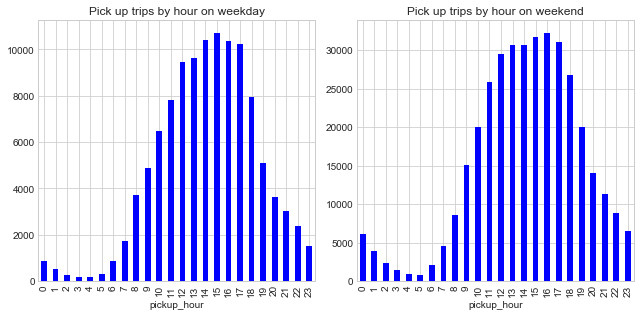

In [36]:
df_customer=df[df['usertype']=='Customer']

COL_NUM=2
ROW_NUM=1
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(9,4.5))

plt.subplot(1,2,1)
df_weekday=df_customer[(df_customer['day_of_week']!=6)&(df_customer['day_of_week']!=7)]
group_weekday = df_weekday.groupby('pickup_hour')
group_weekday.size().plot(kind='bar',title="Pick up trips by hour on weekday",color='b')

plt.subplot(1,2,2)
df_weekend=df[(df['day_of_week']==6)|(df['day_of_week']==7)]
group_weekend = df_weekend.groupby('pickup_hour')
group_weekend.size().plot(kind='bar',title="Pick up trips by hour on weekend",color='b')

plt.tight_layout() 

# Busiest start and end stations

In [38]:
# bar chart of start station density 
#df.groupby('start station name').size().plot(kind='bar',title="start station density")
# filter out the top 5 start station with highest use density
df.groupby('start station name').size().sort_values(ascending=False)[0:5]
# filter out the top 5 start station with lowest use density
df.groupby('start station name').size().sort_values(ascending=True)[0:5]

start station name
Sterling St & Bedford Ave     28
28 St & 40 Ave                36
47 Ave & Skillman Ave         75
Columbia St & Lorraine St     80
11 St & 35 Ave               106
dtype: int64

From the bar chart, we can see the busiest start stations are Pershing Square North, Broadway & E 22 St, E 17 St & Broadway, W 21 St & 6 Ave and 8 Ave & W 33 St. The least busy start station are Sterling St & Bedford Ave, 28 St & 40 Ave, 47 Ave & Skillman Ave, Columbia St & Lorraine St, and 11 St & 35 Ave. Citi bike can consider change the location of the least busy station to improve efficiency.

In [39]:
# bar chart of end station density 
#df.groupby('end station name').size().plot(kind='bar',title="end station density")
# filter out the top 5 end station with highest use density
df.groupby('end station name').size().sort_values(ascending=False)[0:5]
# filter out the top 5 end station with lowest use density
df.groupby('end station name').size().sort_values(ascending=True)[0:5]

end station name
Paulus Hook      1
Grand St         1
Morris Canal     1
City Hall        1
Fairmount Ave    1
dtype: int64

From the bar chart, we can see the busiest end stations are Pershing Square North, E 17 St & Broadway, Broadway & E 22 St, W 21 St & 6 Ave, and 8 Ave & W 31 St. The least end busy station are Paulus Hook, Grand St, Morris Canal, City Hall, and Fairmount Ave. Citi bike can consider change the location of the least busy station to improve efficiency.

# HeatMap WithTime of pick up density

In [43]:
import folium
import folium.plugins as plugins
import numpy as np
df_weekday=df[(df['day_of_week']!=6)&(df['day_of_week']!=7)]
df1=df_weekday.sample(n=30000)

# prepare latitude and longitude data per trip per hour
data=list()
for i in range(24):
    df_=df1[df1['pickup_hour']==i]
    data.append([[df_.iloc[j]['start station latitude'],df_.iloc[j]['start station longitude']]for j in range(len(df_))])

weight = 1  # default value
for time_entry in data:
    for row in time_entry:
        row.append(weight)


In [45]:
# plot heatmap with time
m = folium.Map([40.7204, -73.9280], tiles='stamentoner', zoom_start=12)

hm = plugins.HeatMapWithTime(data)

hm.add_to(m)

m

In [75]:
#match each fps to each hour
time_index = [
    'Time(hour): '+str(k)+':00'
    for k in range(24)
]
m = folium.Map([40.7204, -73.9280], tiles='stamentoner', zoom_start=12)

hm = plugins.HeatMapWithTime(
    data,
    index=time_index,
    auto_play=True,
)

hm.add_to(m)
display(m)
hm.save('/Users/chenyichang/Desktop/Heatmap')

# Pick up density in Manhattan and outer borough

In [50]:
def if_Manhattan_station(latitude,longitude):
    
    # Separate Manhattan into five rectangles to check whether one given point in Manhattan or not.
    # In referrence to the bike distribution in https://member.citibikenyc.com/map/ and 
    
    a1=[(40.6997,40.7080),(-74.0200,-74.0003)]
    a2=[(40.7501,40.8445),(-73.9704,-73.9550)]
    a3=[(40.7080,40.8162),(-74.0200,-73.9704)]
    a4=[(40.7641,40.8445),(-73.9550,-73.9418)]
    a5=[(40.7836,40.8445),(-73.9418,-73.9273)] 
    a6=[(40.7232,40.7609),(-73.9846,-73.9639)]
    
    # Start checking
    if ((a1[0][0]<=latitude<=a1[0][1]) & (a1[1][0]<=longitude<=a1[1][1]))\
    or ((a2[0][0]<=latitude<=a2[0][1]) & (a2[1][0]<=longitude<=a2[1][1]))\
    or ((a3[0][0]<=latitude<=a3[0][1]) & (a3[1][0]<=longitude<=a3[1][1]))\
    or ((a4[0][0]<=latitude<=a4[0][1]) & (a4[1][0]<=longitude<=a4[1][1]))\
    or ((a5[0][0]<=latitude<=a5[0][1]) & (a5[1][0]<=longitude<=a5[1][1]))\
    or ((a6[0][0]<=latitude<=a6[0][1]) & (a6[1][0]<=longitude<=a6[1][1]))\
    or (latitude==40.750020)&(longitude==-73.969053): 
    
        return 1 # point within Manhattan
    else:
        return 0 # point out of Manhattan


<li>Trips by hour between Manhattan and outer borough on weekday

In [51]:
df_weekday=df[(df['day_of_week']!=6)&(df['day_of_week']!=7)]
df_weekday['start station latitude'].astype(float)
df_weekday['start station longitude'].astype(float)
# add column to check whether start and end station in Manhattan or not
df_weekday['if_start_Manhattan']=df_weekday.apply(lambda x: if_Manhattan_station(x['start station latitude'],x['start station longitude']),axis=1)
df_weekday['if_end_Manhattan']=df_weekday.apply(lambda x: if_Manhattan_station(x['end station latitude'],x['end station longitude']),axis=1)

df_weekday['stoptime'] = df_weekday['stoptime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df_weekday['end_hour'] = df_weekday['stoptime'].apply(lambda x:int(datetime.datetime.strftime(x,'%H')))

# separate trip according to direction(Manhattan<->outer borough)
df_Manhattan_out=df_weekday[(df_weekday['if_start_Manhattan']==1)&(df_weekday['if_end_Manhattan']==0)]
df_Manhattan_in=df_weekday[(df_weekday['if_start_Manhattan']==0)&(df_weekday['if_end_Manhattan']==1)]

# calculate number of trips per hour based on different directions.
out_count_byhour=dict()
for i in range(24):
    out_count_byhour[i]=df_Manhattan_out[(df_Manhattan_out['pickup_hour']<=i)\
                                         &(i<=df_Manhattan_out['end_hour'])]['tripduration'].count()

in_count_byhour=dict()
for i in range(24):
    in_count_byhour[i]=df_Manhattan_in[(df_Manhattan_in['pickup_hour']<=i)\
                                         &(i<=df_Manhattan_in['end_hour'])]['tripduration'].count()

/Users/chenyichang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/chenyichang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chenyichang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

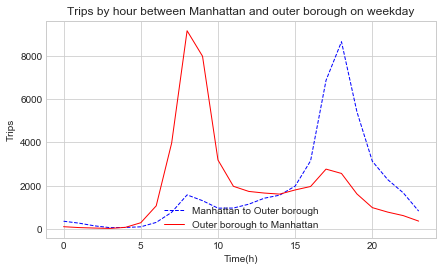

In [52]:
#Plot chart
x1 = out_count_byhour.keys()
y1 = out_count_byhour.values()
x2 = in_count_byhour.keys()
y2 = in_count_byhour.values()
plt.figure(figsize=(7,4)) 
plt.plot(x1,y1,"b--",linewidth=1,label='Manhattan to Outer borough')
plt.plot(x2,y2,"r-",linewidth=1,label='Outer borough to Manhattan')
plt.legend(loc='lower center')
plt.xlabel("Time(h)") 
plt.ylabel("Trips") 
plt.title("Trips by hour between Manhattan and outer borough on weekday")
plt.show()

<li>Trips by hour between Manhattan and outer borough on weekend

In [53]:
df_weekend=df[(df['day_of_week']==6)|(df['day_of_week']==7)]

df_weekend['if_start_Manhattan']=df_weekend.apply(lambda x: if_Manhattan_station(x['start station latitude'],x['start station longitude']),axis=1)
df_weekend['if_end_Manhattan']=df_weekend.apply(lambda x: if_Manhattan_station(x['end station latitude'],x['end station longitude']),axis=1)

df_weekend['stoptime'] = df_weekend['stoptime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df_weekend['end_hour'] = df_weekend['stoptime'].apply(lambda x:int(datetime.datetime.strftime(x,'%H')))

df_Manhattan_out=df_weekend[(df_weekend['if_start_Manhattan']==1)&(df_weekend['if_end_Manhattan']==0)]
df_Manhattan_in=df_weekend[(df_weekend['if_start_Manhattan']==0)&(df_weekend['if_end_Manhattan']==1)]

out_count_byhour=dict()
for i in range(24):
    out_count_byhour[i]=df_Manhattan_out[(df_Manhattan_out['pickup_hour']<=i)\
                                         &(i<=df_Manhattan_out['end_hour'])]['tripduration'].count()

in_count_byhour=dict()
for i in range(24):
    in_count_byhour[i]=df_Manhattan_in[(df_Manhattan_in['pickup_hour']<=i)\
                                         &(i<=df_Manhattan_in['end_hour'])]['tripduration'].count()


/Users/chenyichang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenyichang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/chenyichang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

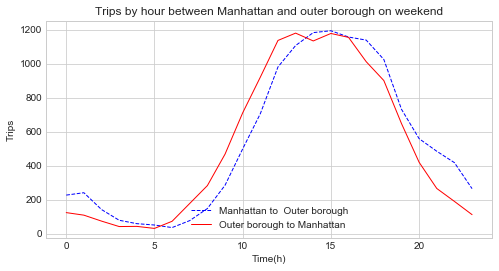

In [54]:
x1 = out_count_byhour.keys()
y1 = out_count_byhour.values()
x2 = in_count_byhour.keys()
y2 = in_count_byhour.values()
plt.figure(figsize=(8,4)) 
plt.plot(x1,y1,"b--",linewidth=1,label='Manhattan to  Outer borough')
plt.plot(x2,y2,"r-",linewidth=1,label='Outer borough to Manhattan')
plt.legend(loc='lower center')
plt.xlabel("Time(h)") 
plt.ylabel("Trips") 
plt.title("Trips by hour between Manhattan and outer borough on weekend")
plt.show()

# Analyze with network

<li>Define a function that returns two things:a graph and a dictionary with station ids as the key and station name as the value
</ol>
<li>The graph contains 
<ol>
<li>nodes (station ids)
<li>edges (station id, station id) (edge (x1,y1) is the same as (y1,x1))
<li>edge data 
<ol>
<li>count: number of trips on the edge
<li>time: average duration - pickup to dropoff - on that edge

In [80]:
df['start station id'] = df['start station id'].apply(int)
df['start station id'] = df['start station id'].apply(str)
df['end station id'] = df['end station id'].apply(int)
df['end station id'] = df['end station id'].apply(str)

In [81]:
def get_citibike_network(df):
    import networkx as nx
    %matplotlib inline
    import matplotlib.pyplot as plt
    G=nx.Graph()
    nodes=list()
    node_names = dict()
    
    # create node_names
    for i in df['start station id'].unique():
        node_names[i]=df[df['start station id']==i]['start station name'].iloc[0]
    for j in df['end station id'].unique():
        if j in node_names.keys():
            continue
        else:
            node_names[j]=df[df['end station id']==j]['end station name'].iloc[0]
    # add nodes
    G.add_nodes_from(node_names.keys())
    
    # redefine start_id and end_id so that edge (x1,y1) is the same as (y1,x1)
    df=df[df['start station id']!=df['end station id']]
    df['start id']=df.apply(lambda x: min(int(x['start station id']),int(x['end station id'])),axis=1)
    df['end id']=df.apply(lambda x: max(int(x['start station id']),int(x['end station id'])),axis=1)
    df['start id'] = df['start id'].apply(str)
    df['end id'] = df['end id'].apply(str)
    
    # calculate number of trips and average duration on the edge
    grouped = df.groupby(['start id','end id'])
    Avg=grouped['tripduration'].mean()
    Count=grouped['tripduration'].count()
    
    # add edges
    for i in Avg.index:
        G.add_edge(i[0],i[1],time=Avg[i])
    for j in Count.index:
        G.add_edge(j[0],j[1],count=Count[j])

    pos=nx.spring_layout(G)
    plt.figure(figsize=(35,35)) 

    # draw nodes
    nx.draw_networkx_nodes(G,pos,node_color='r',node_size=800,alpha=0.8)

    # draw edges
    nx.draw_networkx_edges(G,pos,edgelist=G.edges(),width=3,alpha=0.5,edge_color='b')

    node_name={}
    for node in G.nodes():
        node_name[node]=str(node)
    nx.draw_networkx_edge_labels(G,pos,font_size=10) #draw edge_label

    nx.draw_networkx_labels(G,pos,node_name,font_size=16)  #draw node_name

    plt.axis('off')
    plt.show() # display

    return G,node_names

In [ ]:
G,nodes=get_citibike_network(df)

- Which station (name) has the greatest number of connections (max degree)?

In [87]:
print ('Business station ',nodes[max(list(nx.degree(G)),key=lambda x: x[1])[0]])

Business station  Pershing Square North


- Travel between which pair of stations is the longest in terms of average duration between bike pickups and dropoffs

In [88]:
a1=max([(edge,G.get_edge_data(*edge)) for edge in G.edges()],key=lambda x:x[1]['time'])
print ('Longest average distance all:  ',nodes[a1[0][0]],'  to  ',nodes[a1[0][1]],' . Minutes:  ',int(a1[1]['time']/60))

Longest average distance all:   Nostrand Ave & Myrtle Ave   to   NYCBS DEPOT - DELANCEY  . Minutes:   41681


- Which edge is associated with the most number of trips?

In [89]:
a2=max([(edge,G.get_edge_data(*edge)) for edge in G.edges()],key=lambda x:x[1]['count'])
print ('most trip route all:  ',nodes[a2[0][0]],'  to  ',nodes[a2[0][1]],' . Minutes:  ',int(a2[1]['time']/60))

most trip route all:   E 7 St & Avenue A   to   Cooper Square & Astor Pl  . Minutes:   4


<h2>Centrality</h2>
One of the concerns that the citibike system has to deal with is ensuring that no station has empty slots (a bike should always be available) and that no station should have no empty slots (you should be able to return a bike). To do this, it needs to monitor the movement of bikes through the system, ideally using a directed graph. Though our graph is not directed, we can look at some network characteristics that will help us answer these questions. Note that the "trips" feature in edge data captures flows.

In [90]:
from networkx.algorithms import closeness_centrality
from networkx.algorithms import communicability

- Which node is the "nearest" to all other nodes (irrespective of flows)

In [ ]:
c_c = closeness_centrality(G)
from collections import OrderedDict
cc = OrderedDict(sorted(
                    c_c.items(),
                    key = lambda x: x[1],
                    reverse = True))
cc

In [92]:
print ('Most central in connectivity ',nodes['519'])

Most central in connectivity  Pershing Square North


<li>Which node is the "nearest" to all other nodes (in terms of distance = time)

In [ ]:
c_c1 = closeness_centrality(G,distance='time')
from collections import OrderedDict
cc1 = OrderedDict(sorted(
                    c_c1.items(),
                    key = lambda x: x[1],
                    reverse = True))
cc1

In [94]:
print ('Most central in connectivity using time as distance ',nodes['326'])

Most central in connectivity using time as distance  E 11 St & 1 Ave


- Which node is a possible bottleneck node in terms of bike flows?

In [ ]:
b=nx.betweenness_centrality(G,weight='count')
b1 = OrderedDict(sorted(
                    b.items(),
                    key = lambda x: x[1],
                    reverse = True))
b1

In [97]:
print ('Bottleneck node ',nodes['534'])

Bottleneck node  Water - Whitehall Plaza


<li>Which nodes are peripheral (most likely to be underserved)

In [ ]:
[nodes[i] for i in nx.periphery(G)] 

# Bicycles Exchanges Between Stations

## Finding bicycles that travel long distance and short distance

In [100]:
bike_usage = df.groupby('bikeid')[['distance']].sum()
low_use = bike_usage.sort_values(by=['distance']).index[0:int(len(bike_usage)/20)]  #Top 5 percent bicycles
high_use = bike_usage.sort_values(by=['distance']).index[4*int(len(bike_usage)/20):] #The lowest 5 percent bicycles

## Construct a function that can find the stations that highly used or rarely used bicycles frequently park

In [101]:
def find_station(bike_use):
    station_usage1 = dict()
    station_usage2 = dict()
    for bike in bike_use:
        df1 = df[df.bikeid==bike].groupby('start station name').count()
        max_freq1 = df[df.bikeid==bike].groupby('start station name').size().max()
        for item in df1[df1['start station id'] == max_freq1].index:
            if item not in station_usage1:
                station_usage1[item] = 1
            else:
                station_usage1[item] += 1
        
        df2 = df[df.bikeid==bike].groupby('end station name').count()
        max_freq2 = df[df.bikeid==bike].groupby('end station name').size().max()
        for item in df2[df2['end station id'] == max_freq2].index:
            if item not in station_usage2:
                station_usage2[item] = 1
            else:
                station_usage2[item] += 1
        for item in station_usage2:
            if item not in station_usage1:
                station_usage1[item] = 1
            else:
                station_usage1[item] += station_usage2[item]
    return station_usage1

## Find the stations with top 5 frequency 

In [63]:
h = find_station(high_use)
l = find_station(low_use)
print('Stations that highly used bycicles park are: 'sorted(h, key=h.__getitem__,reverse=True)[0:5])
print('Stations that rarely used bycicles park are: 'sorted(l, key=l.__getitem__,reverse=True)[0:5])

[Stations that highly used bycicles park are: 'Pershing Square North', 'Broadway & E 22 St', 'E 17 St & Broadway', 'Central Park S & 6 Ave', 'W 21 St & 6 Ave']
[Stations that rarely used bycicles park are: 'Hanson Pl & Ashland Pl', 'Grand Army Plaza & Central Park S', 'DeKalb Ave & Hudson Ave', 'Broadway & E 22 St', '3 St & 3 Ave']


# Machine Learning

## Set up the structure of the evaluation table

In [32]:
def distance(lat1, lon1, lat2, lon2):
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    R = 6373
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (np.sin(dlat/2))**2 + np.cos(lat1) * np.cos(lat2) * (np.sin(dlon/2))**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

In [31]:
# df = pd.read_csv(datafile)
df = df.drop(df.index[(df['tripduration'] > 10800)])
# add a new column for distance calculated
df['distance'] = distance(df['start station latitude'], df['start station longitude'], 
                          df['end station latitude'], df['end station longitude'])
# drop abnormal distance
df = df[df['distance'] <= 10]

To compare our model more intuitively, we make a table to compare the criterion among different models.

In [34]:
evaluation = pd.DataFrame({'Model': [],
                           'User_type':[],
                           'Notes':[],
                           'Mean Squared Error (MSE)':[],
                           'R-squared (training)':[],
                           'R-squared (test)':[]})
evaluation

,Model,User_type,Notes,Mean Squared Error (MSE),R-squared (training),R-squared (test)


## Linear Regression Model

First, let's work with the basic regression model--Linear Regression Model. To start with,we model a linear relationship between a response and just one explanatory variable, which is called simple linear regression. By intuition, the distance seems to have the highest correalation with the trip duration.  However, we use the correlation table and the Pearson Correlation Matrix to help us confirm.

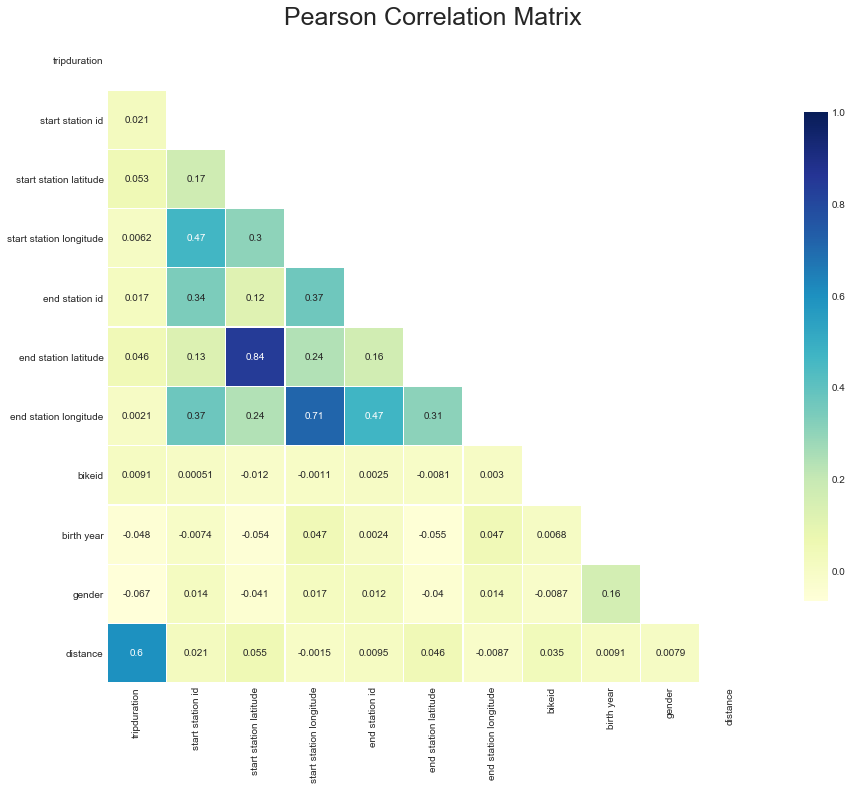

In [35]:
features = ['tripduration','start station id','start station latitude','start station longitude','end station id','end station latitude',
            'end station longitude','bikeid','birth year','gender','distance']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=1.0,square=True,cmap="YlGnBu", 
            linecolor='w',annot=True,mask=mask,cbar_kws={"shrink": .75})

Seeing from the above graph, distance(km) is indeed the most important feature. Thus, we decided to use distance(km) as first feature. Later we will examine the relationship between price and another feature.

Drop the columns that will not be used.

In [36]:
df1=df
df1=df1.drop(['starttime'], axis = 1)
df1=df1.drop(['stoptime'], axis = 1)
df1=df1.drop(['start station name'], axis = 1)
df1=df1.drop(['end station name'], axis = 1)
df1=df1.drop(['start station id'], axis = 1)
df1=df1.drop(['end station id'], axis = 1)
df1=df1.drop(['bikeid'], axis = 1)
df1=df1.drop(['usertype'], axis = 1)
df1=df1.drop(['birth year'], axis = 1)
df1=df1.drop(['gender'], axis = 1)
df1=df1.drop(['start station latitude'], axis = 1)
df1=df1.drop(['end station latitude'], axis = 1)
df1=df1.drop(['start station longitude'], axis = 1)
df1=df1.drop(['end station longitude'], axis = 1)

Prepare for linear regression.
We first split the data into training and testing set.

In [37]:
X = df1.iloc[:,1:]  #Independent variable
y = df1.iloc[:,:1]   #Dependent variable

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

G:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.3568536393600066

In [38]:
import statsmodels.api as sm
X_train_t = sm.add_constant(X_train)
X_test_t = sm.add_constant(X_test)
regressor_OLS = sm.OLS(y_train, X_train_t).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                 7.254e+05
Date:                Sun, 02 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:57:26   Log-Likelihood:            -1.0161e+07
No. Observations:             1312642   AIC:                         2.032e+07
Df Residuals:                 1312640   BIC:                         2.032e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        270.7385      0.788    343.738      0.000     269.195     272.282
distance     297.4008      0.349    851.717      0.000     296.716     298.085
==============================================================================
Omnibus:                  1567370.272   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        241944461.052
Skew:                           6.359   Prob(JB):                         0.00
Kurtosis:                      68.283   Cond. No.                         4.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To help the reader make a good understanding of the result, we draw the following graph to show the accuracy of predicted trip duration line.

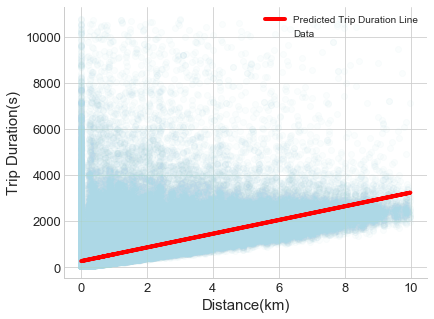

In [39]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test['distance'],y_test['tripduration'],color='lightblue',label="Data", alpha=.05)
plt.plot(X_test,regressor.predict(X_test),color="red",label="Predicted Trip Duration Line",linewidth=4)
plt.xlabel("Distance(km)", fontsize=15)
plt.ylabel("Trip Duration(s)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [41]:
pred1=regressor.predict(X_test)
mse1 =  format(np.sqrt(metrics.mean_squared_error(y_test,pred1)),'.3f')
trsc1 = format(regressor.score(X_train, y_train),'.3f')
tesc1 = format(regressor.score(X_test, y_test),'.3f')
r = evaluation.shape[0]
evaluation.loc[r] = ['Single Linear Regression','Cus+Sub','-',mse1,trsc1,tesc1]
evaluation

,Model,User_type,Notes,Mean Squared Error (MSE),R-squared (training),R-squared (test)
0,Single Linear Regression,Cus+Sub,-,558.180,0.356,0.357


Not reasible! Just 30%!

The result is not good!
We have to find a way to improve the accuracy of the model.

Considering the nature of the two user types -- Customer and Subscriber (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member), we think our prediction will improve a little bit if we exclude the Customer. This is because most customers tend to use the bike for travelling and visiting purpose, which means that they tend to stop to take photos or just look around during the trip. Meanwhile, the customers tend to make a detour during the trip since they are new to a city. Thus, in the following part, we first exclude the usertype of Subscriber to see if the prediction result will improve.

In [42]:
df_s=df
df_s=df[df['usertype']=='Subscriber']

In [43]:
df_s=df_s.drop(['starttime'], axis = 1)
df_s=df_s.drop(['stoptime'], axis = 1)
df_s=df_s.drop(['start station name'], axis = 1)
df_s=df_s.drop(['end station name'], axis = 1)
df_s=df_s.drop(['start station id'], axis = 1)
df_s=df_s.drop(['end station id'], axis = 1)
df_s=df_s.drop(['bikeid'], axis = 1)
df_s=df_s.drop(['usertype'], axis = 1)
df_s=df_s.drop(['birth year'], axis = 1)
df_s=df_s.drop(['gender'], axis = 1)
df_s=df_s.drop(['start station latitude'], axis = 1)
df_s=df_s.drop(['end station latitude'], axis = 1)
df_s=df_s.drop(['start station longitude'], axis = 1)
df_s=df_s.drop(['end station longitude'], axis = 1)

In [44]:
X = df_s.iloc[:,1:]  #Independent variable
y = df_s.iloc[:,:1]   #Dependent variable

from sklearn.cross_validation import train_test_split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_s, y_train_s)
regressor.score(X_test_s,y_test_s)

0.5240463899095977

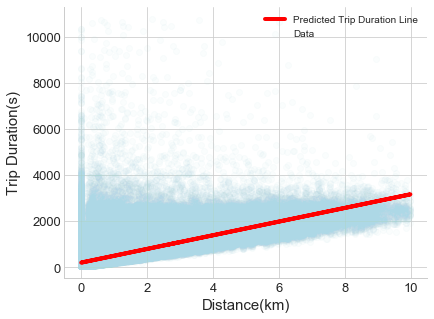

In [45]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test_s['distance'],y_test_s['tripduration'],color='lightblue',label="Data", alpha=.05)
plt.plot(X_test_s,regressor.predict(X_test_s),color="red",label="Predicted Trip Duration Line",linewidth=4)
plt.xlabel("Distance(km)", fontsize=15)
plt.ylabel("Trip Duration(s)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [47]:
pred_s=regressor.predict(X_test_s)
mse_s =  format(np.sqrt(metrics.mean_squared_error(y_test_s,pred_s)),'.3f')
trsc_s = format(regressor.score(X_train_s, y_train_s),'.3f')
tesc_s = format(regressor.score(X_test_s, y_test_s),'.3f')
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','Sub','-',mse_s,trsc_s,tesc_s]
evaluation

,Model,User_type,Notes,Mean Squared Error (MSE),R-squared (training),R-squared (test)
0,Single Linear Regression,Cus+Sub,-,558.180,0.356,0.357
1,Simple Linear Regression,Sub,-,393.396,0.520,0.524


The result seems a litter better when we only consider the Subscriber. It makes sense, since most of the customer tends to ride the bike randomly whereas the subscriber will ride the bike directly to their destinations.

## Multiple Linear Regression--add back more variables

Since the accuracy of the model is not good enough, we add back more variables. In this part we create multiple linear regression model,hoping to improve the accuracy.

In [48]:
df2 = df
df2.corr()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,distance
tripduration,1.000000,0.021250,0.053424,0.006220,0.016810,0.046449,0.002091,0.009131,-0.047967,-0.067017,0.596838
start station id,0.021250,1.000000,0.171678,0.466428,0.337598,0.128234,0.374173,0.000513,-0.007425,0.014202,0.020729
start station latitude,0.053424,0.171678,1.000000,0.304489,0.117564,0.842521,0.237664,-0.011907,-0.053595,-0.040510,0.054584
start station longitude,0.006220,0.466428,0.304489,1.000000,0.370179,0.240523,0.712460,-0.001057,0.046798,0.016894,-0.001504
end station id,0.016810,0.337598,0.117564,0.370179,1.000000,0.163782,0.466719,0.002506,0.002400,0.012430,0.009494
end station latitude,0.046449,0.128234,0.842521,0.240523,0.163782,1.000000,0.310184,-0.008100,-0.054601,-0.040443,0.046348
end station longitude,0.002091,0.374173,0.237664,0.712460,0.466719,0.310184,1.000000,0.002980,0.046706,0.013864,-0.008690
bikeid,0.009131,0.000513,-0.011907,-0.001057,0.002506,-0.008100,0.002980,1.000000,0.006827,-0.008740,0.035343
birth year,-0.047967,-0.007425,-0.053595,0.046798,0.002400,-0.054601,0.046706,0.006827,1.000000,0.158221,0.009133
gender,-0.067017,0.014202,-0.040510,0.016894,0.012430,-0.040443,0.013864,-0.008740,0.158221,1.000000,0.007946


According the correlation table, we will add back the 'start station latitude','start station longitude','end station latitude', 'end station longitude'.

In [49]:
df2=df2.drop(['starttime'], axis = 1)
df2=df2.drop(['stoptime'], axis = 1)
df2=df2.drop(['start station name'], axis = 1)
df2=df2.drop(['end station name'], axis = 1)
df2=df2.drop(['start station id'], axis = 1)
df2=df2.drop(['end station id'], axis = 1)
df2=df2.drop(['bikeid'], axis = 1)
df2=df2.drop(['birth year'], axis = 1)

In [50]:
df2=df2[df2['usertype']=='Subscriber']
df2=df2.drop(['usertype'], axis = 1)
X = df2.iloc[:,1:]  #Independent variable
y = df2.iloc[:,:1]   #Dependent variable

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)
X_train_m = sm.add_constant(X_train)
X_test_m = sm.add_constant(X_test)
regressor_OLS = sm.OLS(y_train, X_train_m).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                 2.145e+05
Date:                Sun, 02 Dec 2018   Prob (F-statistic):               0.00
Time:                        23:00:13   Log-Likelihood:            -8.7195e+06
No. Observations:             1179014   AIC:                         1.744e+07
Df Residuals:                 1179007   BIC:                         1.744e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    8824.7648   1823.845      4.839      0.000    5250.090    1.24e+04
start station latitude    230.5815     23.562      9.786      0.000     184.402     276.761
start station longitude  -100.3235     28.450     -3.526      0.000    -156.084     -44.563
end station latitude     -233.2086     23.761     -9.815      0.000    -279.780    -186.637
end station longitude     216.2232     28.398      7.614      0.000     160.563     271.883
gender                     51.9697      0.785     66.203      0.000      50.431      53.508
distance                  295.8976      0.262   1128.142      0.000     295.384     296.412
==============================================================================
Omnibus:                  1399135.287   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287289747.127
Skew:                           6.155   Prob(JB):                         0.00
Kurtosis:                      78.475   Cond. No.                     6.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
pred2 = regressor.predict(X_test)
mse2  =  format(np.sqrt(metrics.mean_squared_error(y_test,pred2)),'.3f')
trsc2 = format(regressor.score(X_train, y_train),'.3f')
tesc2 = format(regressor.score(X_test, y_test),'.3f')
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression','Sub','-',mse2,trsc2,tesc2]
evaluation

,Model,User_type,Notes,Mean Squared Error (MSE),R-squared (training),R-squared (test)
0,Single Linear Regression,Cus+Sub,-,558.180,0.356,0.357
1,Simple Linear Regression,Sub,-,393.396,0.520,0.524
2,Multiple Linear Regression,Sub,-,392.649,0.522,0.526


The result of the multiple linear regression model improves just a little, so we continue to find better models to improve the accuracy. This time, we consider the nonlinear model.

## Polynomial Regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
polyfeat = PolynomialFeatures(degree=2)
X_train_poly = polyfeat.fit_transform(X_train_s)
X_test_poly = polyfeat.fit_transform(X_test_s)
poly = linear_model.LinearRegression().fit(X_train_poly, y_train_s['tripduration'])

In [53]:
pred3=poly.predict(X_test_poly)
poly.score(X_test_poly, y_test_s['tripduration'])
msepoly1 = format(np.sqrt(metrics.mean_squared_error(y_test_s['tripduration'],pred3)),'.3f')
rtrpoly1 = format(poly.score(X_train_poly,y_train_s['tripduration']),'.3f')
rtepoly1 = format(poly.score(X_test_poly,y_test_s['tripduration']),'.3f')
r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Regression','Sub','degree=2',msepoly1,rtrpoly1,rtepoly1]
evaluation

,Model,User_type,Notes,Mean Squared Error (MSE),R-squared (training),R-squared (test)
0,Single Linear Regression,Cus+Sub,-,558.180,0.356,0.357
1,Simple Linear Regression,Sub,-,393.396,0.520,0.524
2,Multiple Linear Regression,Sub,-,392.649,0.522,0.526
3,Polynomial Regression,Sub,degree=2,392.981,0.521,0.525


In [54]:
polyfeat = PolynomialFeatures(degree=3)
X_train_poly = polyfeat.fit_transform(X_train_s)
X_test_poly = polyfeat.fit_transform(X_test_s)
poly = linear_model.LinearRegression().fit(X_train_poly, y_train_s['tripduration'])
pred4=poly.predict(X_test_poly)
msepoly2 = format(np.sqrt(metrics.mean_squared_error(y_test_s['tripduration'],pred4)),'.3f')
rtrpoly2 = format(poly.score(X_train_poly,y_train_s['tripduration']),'.3f')
rtepoly2 = format(poly.score(X_test_poly,y_test_s['tripduration']),'.3f')
r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Regression','Sub','degree=3',msepoly2,rtrpoly2,rtepoly2]
evaluation

,Model,User_type,Notes,Mean Squared Error (MSE),R-squared (training),R-squared (test)
0,Single Linear Regression,Cus+Sub,-,558.180,0.356,0.357
1,Simple Linear Regression,Sub,-,393.396,0.520,0.524
2,Multiple Linear Regression,Sub,-,392.649,0.522,0.526
3,Polynomial Regression,Sub,degree=2,392.981,0.521,0.525
4,Polynomial Regression,Sub,degree=3,390.732,0.526,0.530


Finally, we could find that Polynomial Regression(degree=3) has a better accuracy... 